In [1]:
import numpy as np
import librosa
import librosa.display
import os
from matplotlib import pyplot as plt
import random

Dataset\fujitou_angry\fujitou_angry_001.wav


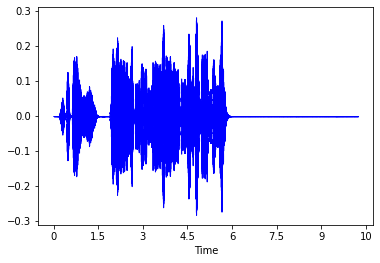

In [4]:
# attempt to load a wave file
wav_data_path = os.path.join("Dataset","fujitou_angry","fujitou_angry_001.wav") 
print(wav_data_path)
x, fs = librosa.load(wav_data_path, sr=44100)

librosa.display.waveshow(x, sr=fs, color='blue')

In [3]:
x.shape

(462168,)

<ipython-input-4-e00070e708b3>:2: FutureWarning: Pass y=[ 2.9128509e-05 -9.4395460e-07  3.6090707e-05 ... -6.3290267e-05
  1.2563883e-05 -3.4199227e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


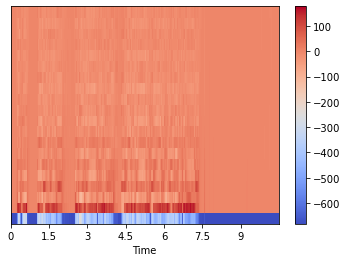

In [4]:
# transfer from wav to mfcc
mfccs = librosa.feature.mfcc(x, sr=fs)
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [11]:
# noticed there are regions before and after the recording without any voice, attempt to remove them
def cut_silence(wavdata, eps=0.01):
    abs_data = np.abs(wavdata)
    threshold = np.max(abs_data) * eps
    #cut data < 0.01 * max y value from the beginning
    start = 0
    while start < len(wavdata) and abs_data[start] < threshold:
        start += 1
    #cut data < 0.01 * max y value from the end
    end = len(wavdata)-1
    while end > 0 and abs_data[end] < threshold:
        end -= 1
    return wavdata[start:end+1]

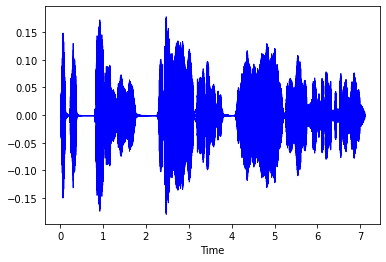

In [6]:
# after cutting, show the wav data
x = cut_silence(x)
librosa.display.waveshow(x, sr=fs, color='blue')

In [7]:
x.shape

(313076,)

<ipython-input-9-7fdcbabb9d7f>:2: FutureWarning: Pass y=[ 0.00181506  0.00190042  0.00191989 ... -0.00177617 -0.0016502
 -0.00180526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


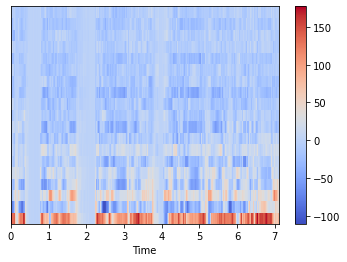

In [9]:
# trasfer to mfcc again
mfccs = librosa.feature.mfcc(x, sr=fs)
# Row 0 of mfcc only conveys a constant offset, which can be discarded when performing classification
mfccs = mfccs[1:]
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [10]:
mfccs

array([[115.239395 , 163.57368  , 177.12724  , ...,  56.15554  ,
         63.54048  ,  83.17726  ],
       [ 55.902008 ,  24.222504 , -20.815758 , ...,  44.968475 ,
         44.119144 ,  39.701004 ],
       [ 35.899372 ,   3.9253197,  -3.994861 , ...,  86.03823  ,
         72.359406 ,  49.972763 ],
       ...,
       [ -7.6034675, -13.884184 , -19.964054 , ..., -11.882668 ,
        -11.212208 , -13.860872 ],
       [-17.871193 , -21.632685 , -27.484322 , ...,  -7.4614677,
         -2.5080838,  -5.3353515],
       [ -7.575162 ,  -3.253449 ,  -5.9305897, ...,   1.4064724,
         -1.5133917,  -3.259406 ]], dtype=float32)

Following blocks are adapted from a website: https://qiita.com/atily17/items/ca9c594ec678f241e8bf

In [7]:
# Transfer from wav to mfcc files and save as npy files all together
DATASET_DIR="Dataset"

wavdatas = []

dirlist = os.listdir(DATASET_DIR)
for d in dirlist:
    d = os.path.join(DATASET_DIR, d)
    datalist = os.listdir(d)
    y = [d[d.find("\\")+1:d.find("_")], d[d.find("_") + 1:]] # from file name to determine the correct label
    datalist = [[os.path.join(d,x), y] for x in datalist]
    wavdatas.extend(datalist)

In [8]:
MFCCs_DATA = "MFCCsData"

dirlist = os.listdir(DATASET_DIR)
for d in dirlist:
    os.makedirs(os.path.join(MFCCs_DATA, d), exist_ok=True)

In [15]:
def get_mfcc(datadir):
    x, fs = librosa.load(datadir, sr=44100)
    x = cut_silence(x)
    mfccs = librosa.feature.mfcc(y=x, sr=fs)
    mfccs = mfccs[1:]
    return mfccs, x, fs

In [16]:
nn = len(wavdatas)
for i, data in enumerate(wavdatas):
    path_list = data[0].split("\\")
    path_list[0] = MFCCs_DATA
    path_list[2] = path_list[2].replace(".wav", ".npy")
    mfccs_path = "\\".join(path_list)
    mfcc,x,fs = get_mfcc(data[0])
    if i%10 == 0:
        print(i, "/", nn)
    np.save(mfccs_path, mfcc)

0 / 900
10 / 900
20 / 900
30 / 900
40 / 900
50 / 900
60 / 900
70 / 900
80 / 900
90 / 900
100 / 900
110 / 900
120 / 900
130 / 900
140 / 900
150 / 900
160 / 900
170 / 900
180 / 900
190 / 900
200 / 900
210 / 900
220 / 900
230 / 900
240 / 900
250 / 900
260 / 900
270 / 900
280 / 900
290 / 900
300 / 900
310 / 900
320 / 900
330 / 900
340 / 900
350 / 900
360 / 900
370 / 900
380 / 900
390 / 900
400 / 900
410 / 900
420 / 900
430 / 900
440 / 900
450 / 900
460 / 900
470 / 900
480 / 900
490 / 900
500 / 900
510 / 900
520 / 900
530 / 900
540 / 900
550 / 900
560 / 900
570 / 900
580 / 900
590 / 900
600 / 900
610 / 900
620 / 900
630 / 900
640 / 900
650 / 900
660 / 900
670 / 900
680 / 900
690 / 900
700 / 900
710 / 900
720 / 900
730 / 900
740 / 900
750 / 900
760 / 900
770 / 900
780 / 900
790 / 900
800 / 900
810 / 900
820 / 900
830 / 900
840 / 900
850 / 900
860 / 900
870 / 900
880 / 900
890 / 900


Now all mfcc files are saved in a directory named "MFCCsData". 

In [17]:
numpy_datas = []

dirlist = os.listdir(MFCCs_DATA)
for d in dirlist:
    d = os.path.join(MFCCs_DATA, d)
    datalist = os.listdir(d)
    datalist = [[np.load(os.path.join(d,x)), os.path.join(d,x)] for x in datalist]
    numpy_datas.extend(datalist)

All mfcc data are contained in numpy_datas, which is a list. 
The each entry of the list is another list consistes of [mfccs, file name]

In [18]:
numpy_datas

[[array([[ 95.559525  ,  86.98697   ,  81.04467   , ...,  42.23462   ,
           52.16474   ,  83.32338   ],
         [ 43.412605  ,  36.08561   ,  33.36247   , ...,   4.535635  ,
           12.176806  ,  29.673584  ],
         [ 19.48138   ,  23.376354  ,  24.859716  , ...,  69.69026   ,
           57.215595  ,  29.031998  ],
         ...,
         [ -3.8282428 ,  -5.806698  ,  -5.699748  , ...,  -8.154301  ,
          -12.936133  ,  -6.768589  ],
         [-10.654982  ,  -8.89759   , -10.843164  , ...,   0.21068054,
           -2.3907657 ,  -1.934056  ],
         [-15.026709  , -11.817776  , -14.014464  , ...,  -7.651658  ,
           -7.5549808 ,  -3.4352021 ]], dtype=float32),
  'MFCCsData\\fujitou_angry\\fujitou_angry_001.npy'],
 [array([[118.316414 , 107.34442  ,  92.07872  , ...,  83.81505  ,
           92.11894  ,  98.34755  ],
         [ 51.394375 ,  54.701958 ,  49.42708  , ..., -25.818954 ,
           -9.129567 ,  13.525715 ],
         [ 24.425955 ,  31.763256 ,  36.834167 

In [19]:
len(numpy_datas)

900

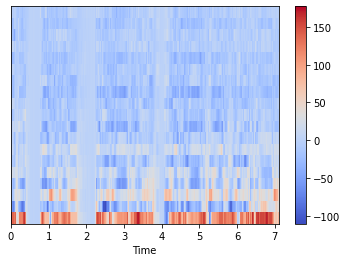

In [20]:
# try to retrieve the original example 
librosa.display.specshow(numpy_datas[200][0], sr=fs, x_axis='time')
plt.colorbar()

Separate the data list according to the label. Change file name to correct label. [1,0,0] is angry, [0,1,0] is happy, [0,0,1] is normal.

In [21]:
# change file name to correct label
angry = []
happy = []
normal = []

for i in range(len(numpy_datas)):
    file_name = numpy_datas[i][1]
    if "angry" in file_name:
        numpy_datas[i][1] = np.array([1,0,0])
        angry.append(numpy_datas[i])
    elif "happy" in file_name:
        numpy_datas[i][1] = np.array([0,1,0])
        happy.append(numpy_datas[i])
    else:
        numpy_datas[i][1] = np.array([0,0,1])
        normal.append(numpy_datas[i])

In [22]:
# check list with a certain emotion label
len(angry)

300

In [23]:
# check the shape of label
angry[0][1].shape

(3,)

Now split the Train-Valid-Test data with a ratio of 60%-20%-20%

In [24]:
# first shuffle the list of each emotion
random.shuffle(angry)
random.shuffle(happy)
random.shuffle(normal)

In [25]:
# then select the first 180 in each emotion as train data, first 60 in each emotion as valid data, and first 60 in each emotion as test data
train_data = angry[:int(len(angry)*0.6)] + happy[:int(len(happy)*0.6)] + normal[:int(len(normal)*0.6)]
valid_data = angry[int(len(angry)*0.6):int(len(angry)*(0.6+0.2))] + happy[int(len(happy)*0.6):int(len(happy)*(0.6+0.2))] + normal[int(len(normal)*0.6):int(len(normal)*(0.6+0.2))]
test_data = angry[int(len(angry)*(0.6+0.2)):] + happy[int(len(happy)*(0.6+0.2)):] + normal[int(len(normal)*(0.6+0.2)):]
random.shuffle(train_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [26]:
train_data

[[array([[ 8.38789597e+01,  7.12230835e+01,  5.87598419e+01, ...,
           1.10436264e+02,  9.55376511e+01,  8.80921326e+01],
         [ 3.02680511e+01,  3.02023487e+01,  2.30494881e+01, ...,
          -1.12776123e+02, -8.08271332e+01, -6.45271454e+01],
         [-5.89396811e+00, -1.27341092e+00, -3.10676694e-02, ...,
          -2.28162537e+01, -1.98727589e+01, -2.43684731e+01],
         ...,
         [ 9.55626202e+00,  1.90693359e+01,  2.64630070e+01, ...,
          -8.03743553e+00, -7.58852863e+00, -6.92195892e+00],
         [ 9.90481186e+00,  2.03233757e+01,  3.45353622e+01, ...,
          -1.03143120e+01, -7.05368900e+00, -8.41274643e+00],
         [ 5.95852613e+00,  1.60612030e+01,  3.43361511e+01, ...,
           1.63787532e+00, -2.07762122e-01, -1.84981298e+00]], dtype=float32),
  array([0, 1, 0])],
 [array([[ 1.13135582e+02,  1.16461212e+02,  1.13989265e+02, ...,
           9.61904373e+01,  6.67464600e+01,  7.95879288e+01],
         [ 5.09882469e+01,  5.73400383e+01,  3.68039